# Assignment III - Logistic Regression
### Year 2020-2021- Semester II
### CCE3502
####  developed by - Adrian Muscat, 2021
---
# Wayne Falzon, 225401L, BS CS and Math yr 2 
---

In preparation for this assignment you will first implement a gradient descent optimizer  to fit a logistic regression model to a binary classification dataset.

You will then use the functions developed to implement a multi-class model. You are graded on the latter.

NOTES: 
1. The first few questions are not graded (class-work), whereas the last three numbered questions are graded (home-work), total marks = 100.

1. You will find the functions developed in the non-graded part necessary in the graded part.

3. The assignment is worth 20% of the final unit mark.

2. Submit a pdf version of the final jupyter notebook (as a turn-it-in job on VLE) and the jupyter notebook itself separately (as an assignment job on VLE)

2. This assignment is to be attempted individually. It is essential that the work you submit and present consists only of your own work; use of copied material will be treated as plagiarism. Discussion is only permitted on general issues, and it is absolutely forbidden to discuss specific details with anyone and/or share results.


# Non-graded part starts here

In this part, you will load a binary classification synthetic fish dataset and use it to develop a general logistic-regression model. Some parts of the solution are pre-coded. You are expected to code the other parts during the lab session. You will use the validated  model developed in this part to answer the Graded questions.

In [1]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt
import csv
import matplotlib.patches as patches
import pickle
from IPython.display import Image
%matplotlib inline

In [2]:
# DO NOT MODIFY THIS CELL
# We first load the fish dataset
with open('Fish_Dataset_2020.csv', 'r') as f:
    reader = csv.reader(f)
    data_=[]
    for i,row in enumerate(reader):
        if i==0: print(row)
        else:
            data_.append(row)
data = np.array(data_,dtype=float)
#We take a look at the first 10 examples
data[0:10]
#Note in the form [x1,x2,t] for first example 

['Length', ' Width', ' Class(0=spnott', ' 1=awrat)']


array([[22.93,  7.24,  1.  ],
       [36.35,  9.97,  0.  ],
       [27.81, 10.4 ,  1.  ],
       [35.84, 11.25,  0.  ],
       [16.53,  5.56,  1.  ],
       [29.76,  8.1 ,  0.  ],
       [17.78,  6.31,  1.  ],
       [29.08,  8.37,  1.  ],
       [19.39,  7.85,  1.  ],
       [35.48, 10.41,  0.  ]])

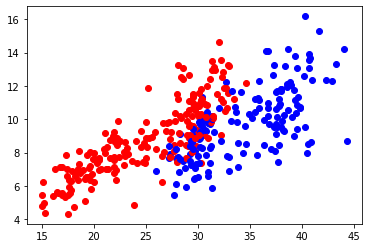

In [3]:
#We plot the scatter plot (red = awrat class, blue = spnott class) 
for item in data:
    if item[2]==0:
        plt.plot(item[0],item[1],'bo')
    if item[2]==1:
        plt.plot(item[0],item[1],'ro')
plt.show()

In [4]:
data[:,2]==1 #To get target values which equal 1  
data[data[:,2]==1,0] #to get x1 where the values are 1

array([22.93, 27.81, 16.53, 17.78, 29.08, 19.39, 20.01, 22.92, 19.95,
       18.1 , 30.13, 27.88, 22.26, 16.97, 17.94, 16.04, 19.61, 17.57,
       17.76, 22.36, 29.45, 30.09, 23.29, 30.22, 30.29, 32.62, 29.54,
       21.94, 31.6 , 31.7 , 19.16, 20.13, 24.99, 25.56, 18.53, 28.04,
       25.06, 24.54, 30.13, 30.  , 21.3 , 22.12, 30.63, 20.74, 24.16,
       32.39, 26.53, 17.59, 28.84, 33.51, 32.73, 33.04, 29.59, 31.42,
       22.11, 29.14, 32.57, 28.61, 32.26, 19.56, 18.98, 15.29, 21.38,
       23.2 , 27.73, 30.85, 29.65, 18.68, 21.91, 32.25, 29.9 , 21.2 ,
       23.7 , 17.54, 32.21, 18.43, 21.1 , 18.23, 27.7 , 25.94, 29.82,
       26.59, 29.5 , 25.85, 29.71, 22.47, 31.17, 29.56, 31.23, 28.93,
       25.1 , 23.19, 29.29, 28.91, 22.19, 20.53, 21.96, 31.44, 17.38,
       19.61, 23.03, 16.97, 21.98, 30.13, 30.35, 20.04, 26.72, 27.8 ,
       28.18, 20.53, 16.74, 32.06, 28.84, 25.03, 19.26, 32.93, 28.6 ,
       32.9 , 21.07, 32.47, 19.73, 16.45, 29.45, 30.42, 28.25, 28.95,
       30.09, 29.27,

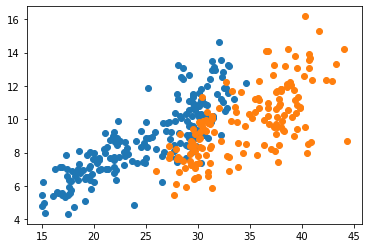

In [5]:
plt.scatter(data[data[:,2]==1,0],data[data[:,2]==1,1])
plt.scatter(data[data[:,2]==0,0],data[data[:,2]==0,1])

In [6]:
# DO NOT MODIFY THIS CELL
# We now split the dataset into the train portion and the test portion
train_size = 0.7
np.random.seed(seed=1) # DO NOT CHANGE THE SEED
np.random.shuffle(data)
train_split = int(len(data)*train_size) # DO NOT CHANGE THE split ratio
print('Dataset size = ',len(data))
print ('Split dataset at ', train_split)
d_train=np.copy(data[0:train_split,:]) #Copy create a new array in a new memory location 
d_test = np.array(data[train_split:,:])
print ('Shape of train = ',np.shape(d_train))
print ('Shape of test = ',np.shape(d_test))

Dataset size =  355
Split dataset at  248
Shape of train =  (248, 3)
Shape of test =  (107, 3)


In [7]:
# We now save the original features and split
# Such that we can refer back to them after normalisation
X_train_raw = np.copy(d_train[:,0:2])
y_train = np.copy(d_train[:,2])
X_test_raw = np.copy(d_test[:,0:2])
y_test = np.copy(d_test[:,2]) #This cell may be extra 

In [8]:
# normalisation
#
# We first save the original features and split X and y
# Such that we can refer back to them after normalisation
X_train_raw = np.copy(d_train[:,0:2])
y_train = np.copy(d_train[:,2])
X_test_raw = np.copy(d_test[:,0:2])
y_test = np.copy(d_test[:,2])
#
X_mean=X_train_raw.mean(axis=0)
print(X_mean)
X_var = X_train_raw.var(axis=0)
print(X_var)
X_train = np.copy((X_train_raw - X_mean)/np.sqrt(X_var))
print('train mean', X_train.mean(axis=0))
print('train var',X_train.var(axis=0))
X_train.shape
#
X_test = np.copy((X_test_raw - X_mean)/np.sqrt(X_var))
print(X_test.mean(axis=0))
print(X_test.var(axis=0))
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

[29.26943548  9.31822581]
[45.68616904  5.27849847]
train mean [ 3.67688630e-15 -6.71505862e-17]
train var [1. 1.]
[-0.01836152 -0.11731639]
[1.04976307 0.74404694]
(248, 2) (248,)
(107, 2) (107,)


0

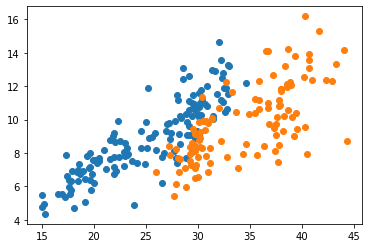

In [9]:
# plot the scatter diagram for the train set

def plot_scatter(D):
    plt.scatter(D[D[:,2]==1,0],D[D[:,2]==1,1])
    plt.scatter(D[D[:,2]==0,0],D[D[:,2]==0,1])
    return 0

plot_scatter(d_train)
    

#for i in range(len(X_train)):
#    if y_train[i] ==0:
#        plt.plot(X_train[i][0], X_train[i][1], 'go')
#    if y_train[i] ==1:
#       plt.plot(X_train[i][0], X_train[i][1], 'yo')
#plt.show()


0

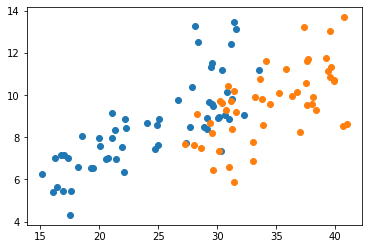

In [10]:
# plot the scatter diagram for the test set
plot_scatter(d_test)

#for i in range(len(X_test)):
#    if y_test[i] ==0:
#        plt.plot(X_test[i][0], X_test[i][1], 'go')
#    if y_test[i] ==1:
#        plt.plot(X_test[i][0], X_test[i][1], 'yo')
#plt.show()


In [11]:
def lr_loss_function(y_target,y_predicted):
    #
    #y_target: actual gold labels (vector of size(m,))
    #y_predicted : predicted probabilities for positive class (vector of size (m,))
    #
    m=y_target.shape[0]
    # write down your code below to compute the cross-entropy loss
    #################################################################################
    L = -((y_target*np.log(y_predicted) + (1-y_target)*np.log(1-y_predicted)).sum())/m
    #################################################################################
    return L

def predict_y_prob(W,D):
    # W is the weight vector [[w_0],[w_1],[w_2],...] of size [N+1,1]
    # where N is number of features, excluding bias
    # D is the feature matrix [m,N] where m is the number of examples
    #
    m = D.shape[0]
    #
    # Write down your code below to compute the probability 
    # of the positive class given the weights and features
    # for all m examples and return a vector of size (m,1)
    #################################################################################
    bias = np.ones([m,1], dtype=float) #creating bias
    X = np.concatenate((bias,D), axis=1) #adding the bias 
    z = np.matmul(W.T,X.T) #finding z
    y = 1/(1+np.exp(-z))  #find the probability
    #################################################################################
    #
    return y.T #Need to return a coloum vector 

def get_accuracy(W,X,y):
    # W is the weight vector [[w_0],[w_1],[w_2],...] of size [N+1,1]
    # where N is number of features, excluding bias
    # X is the feature matrix [m,N] where m is the number of examples
    # y is the gold label vector of size (m,)
    #
    # Write down your code below to compute the accuracy
    # in predicting the positive class and return a scalar
    
    #Note bias for X added in function call 
    #################################################################################
    Y_pred = (predict_y_prob(W,X)>=0.5).astype(int)
    acc = (Y_pred.ravel() == y).astype(int).sum()/y.shape[0] #Matching with y (the target), 
    #and taking amount of correct predicitions over total examples
    #################################################################################
    #
    return acc


In [12]:
#Sanity check 
X_example = np.array([[1,2],[3,4]])
w_example = np.array([[.1],[.2],[.4]])

predict_y_prob(w_example,X_example)
get_accuracy(w_example, X_example, np.array([1,0]))

0.5

In [13]:
# Implement Gradient Descent
# To implement Gradient Descent you should have the update equations at hand
# The update equations require the partial derivatives of the loss function
# with respect to the weights or parameter of the model
#
def lr_train_model(X_data, 
                   y_data, 
                   split_frac=0.8, 
                   init_weight=0.00001, 
                   no_iterations=2000,
                   alpha = 0.001,
                   phi = 0.001): #phi is lamda
    #
    # X_data : data feature matrix
    # y_data : data output labels
    # split_frac : data split fraction
    # init_weight : initial weights
    # alpha : learning rate
    #
    
    X_data = np.copy(X_data)
    y_data = np.copy(y_data)
    
    split = int(y_data.shape[0]*split_frac)
    #print("Split = ", split)
    y_train_x = y_data[0:split]
    y_val_x = y_data[split:]
    
    X_train_x = X_data[0:split]
    X_val_x = X_data[split:]
    
    
    N = X_data.shape[1] # number of features
    W = np.full((N+1,1), init_weight) # initialise weight vectors
    m=y_train_x.shape[0]
    
    
    history_loss=[]
    history_val_loss=[]
    #
    for itr in range(no_iterations):
        
        y_pred_pr = predict_y_prob(W,X_train_x).ravel()
        loss = lr_loss_function(y_train_x,y_pred_pr)
        
        #Record history 
        history_loss.append(loss)
        history_val_loss.append(lr_loss_function(y_val_x,predict_y_prob(W,X_val_x).ravel()))
        #
        #################################################################################
        # Write your code below to update w[0]
        W[0] = W[0] + alpha * (y_train_x - y_pred_pr).sum()/m 
        #################################################################################
        #
        #################################################################################        
        # Write your code below to update w[1...N]
     
        for j in range(1,N+1):
            W[j] = W[j] + (alpha * (y_train_x - y_pred_pr)*X_train_x[:,j-1] - phi*W[j]).sum()/m
            
        #################################################################################
    #
    
    return {'weights':W, 'history':{'train_loss':history_loss, 
                                    'val_loss':history_val_loss},
            'train_acc':get_accuracy(W,X_train_x,y_train_x),
            'val_acc':get_accuracy(W,X_val_x,y_val_x)}

def display_results(model):
    #
    history_train_loss = model['history']['train_loss']
    history_val_loss = model['history']['val_loss']
    t=range(len(history_train_loss))
    plt.plot(t,history_train_loss,'b',t,history_val_loss,'r')
    #
    print('train acc : ', model['train_acc'])
    print('val acc   : ', model['val_acc'])
    #
    print('Weights : ', model['weights'].ravel())
    return 0

train acc :  0.8888888888888888
val acc   :  0.92
Weights :  [ 0.44132078 -3.21298966  1.3246645 ]


0

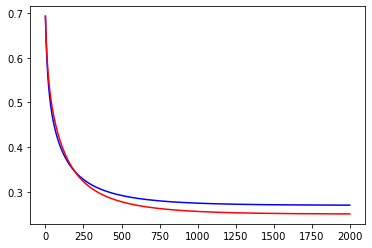

In [14]:
lr_fish_model = lr_train_model(X_train, y_train,split_frac=0.8, 
                   init_weight=0.00001, no_iterations=2000,
                   alpha = 0.1,
                   phi =.001)
display_results(lr_fish_model)

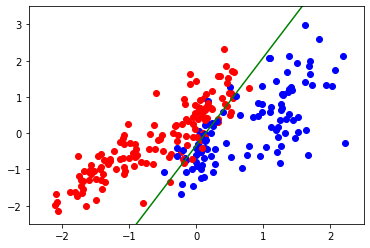

In [15]:
# We now plot the decision boundary on the scatter plot
#
for j, item in enumerate(X_train):
    if y_train[j]==0:
        plt.plot(item[0],item[1],'bo')
    if y_train[j]==1:
        plt.plot(item[0],item[1],'ro')

# Write your code below to plot the decision boundary on scatter plot
#################################################################################
# Define line and plot

cc = -lr_fish_model['weights'][0]/lr_fish_model['weights'][2]
mm = -lr_fish_model['weights'][1]/lr_fish_model['weights'][2]
xx = np.linspace(-2.5, 2.5,10)


yy = cc + mm*xx 
plt.plot(xx,yy,'g')
plt.axis([-2.5,2.5,-2.5,3.5])
plt.show()
#################################################################################



## At this point you can experiment with dataset split ratio, learning rate and regularisation constant.

# Graded Questions below

<p>In this part you will be building a multi-class classification model.</p>
<p>You will be using a very small subset of the VRD (Visual Relation Detection) dataset, which is a real-world dataset. The VRD task is defined as:
Given two objects, what is the relation between them?
Below is an example. The image depicts two bicycles and a person. The person is enclosed in a blue bounding box and the bicycle on the right in a green bounding box. The task of the model is to select an appropriate spatial relation between the two objects, for example</p>
<p>Person TO THE LEFT OF bicycle</p>
<p>Bicycle TO THE RIGHT OF person</p>
<img src="2008_008320_BB.jpeg" alt="drawing" width="300"/>
<p>The VRD task is not simple and the relation selected often depends on external influences, such as the frame of reference. For example humans tend to take the point of view of the depicted person rather than the camera view. For example "Bicycle TO THE LEFT OF person" is also correct. Unless corrected such labels manifest themselves as noise in the dataset and are a source of confusion during learning. Further more note that the relation changes if the order of the two objects changes. In general one object (the trajector) is located with respect to the other object (the landmark)</p>
<p>Data pre-processing is a very important task in any machine learning project and often requires significant knowledge of the domain. In the case of this assignment, the dataset has been prepared for you, complete with feature extraction and class labels since the study unit deals solely with the develpment of the model. This means that for this assignment you do not need domain knowledge and in any case the domain is from every day life and typically common sense.</p>
<p> Specifically the dataset is characterised by six real-valued features and four categorical output classes.</p>
<p> Your task is to develop a multi-class model by adapting the logistic-regression model developed collectively in class. So make sure you have understood this model, debugged and verified the code in the previous non-graded part.</p> 
<p>Follow below cells and answer the questions.</p>

In [16]:
# Load dataset
data = pickle.load(open("A3_Dataset.pkl", "rb"))
#

In [17]:
# We now explore the dataset
#
# The examples are organised as a list
print("Number of examples = ",len(data),"\n")
#
# Let us explore one example
example = data[0]
# each example is organised in a dictionary structure check using type(example))
print("Keys in example dictionary :",data[0].keys(),"\n")
# below is an explanation for each key
# Each example refers to an image and two objects in the image
# 'filename' : filename of image
# 'imSizeX', 'imSizeY' : size of image in pixels
# 'landmark', 'trajector' : the two objects (object, subject)
# 'spatial_label' : the output class
# 'geo_feat' : the input features for the spatial configuration
#
# NOTE: In this assignment you only need to use 'spatial_label' and 'geo_feat'
#
# Let us explore 'spatial_label':
print('Some example output labels:')
for item in data[8:12]:
    print("   ",item['spatial_label'])
print()
# There are actually four unique labels in the dataset
#
# Let us explore the features
print('Feature Headings:')
for item in list(data[0]['geo_feat'].keys()):
    print("   ",item)
# The first four and the last two are somewhat correlated
# So it may be the case can we can use either or both 
# Resulting in models of various complexity
# And finally, let us see some examples of features
print("\nThe features for one example:")
feat_keys = list(data[0]['geo_feat'].keys())
for item in feat_keys:
    print("   ",data[0]['geo_feat'][item])

Number of examples =  1199 

Keys in example dictionary : dict_keys(['filename', 'imSizeX', 'imSizeY', 'landmark', 'trajector', 'spatial_label', 'geo_feat']) 

Some example output labels:
    above
    on the right of
    on the left of
    under

Feature Headings:
    InvFeatXminXmin
    InvFeatXmaxXmin
    InvFeatYminYmin
    InvFeatYmaxYmin
    unitVecTrajLand_Norm_wt_UnionBB_x
    unitVecTrajLand_Norm_wt_UnionBB_y

The features for one example:
    0.839041095890411
    1.9623287671232876
    0.11178247734138973
    0.6797583081570997
    0.9751722346356505
    0.22144776538884195


In [18]:
# DO NOT MODIFY THIS CELL
# copy features and classes into numpy arrays
geo_feat_keys = list(data[0]['geo_feat'].keys())
m = len(data)  # number of examples
N = len(geo_feat_keys) # number of features
X_data = np.zeros((m,N))
y_data = np.zeros(m)
#
# code a label encoder
label_encode = {'above':0,
                'under':1,
                'on the left of':2,
                'on the right of':3}
#
label_decode = {0:'above',
                1: 'under',
                2: 'on the left of',
                3: 'on the right of'}

#
for j, item in enumerate(data[0:]):
    # store geo_feat in array
    dummy = np.zeros(N)    
    for i, g in enumerate(geo_feat_keys):
        dummy[i] = item['geo_feat'][g]
    X_data[j,:] = np.copy(dummy)
    y_data[j] = label_encode[item['spatial_label']]
                   
    
print("Shape of X :",X_data.shape)
print("Shape of y :",y_data.shape)

Shape of X : (1199, 6)
Shape of y : (1199,)


In [19]:
# DO NOT MODIFY THIS CELL
#
# Split the dataset into train and test
S=(int)(1199*.8)
print(S)
X_train = X_data[0:S,0:6]
y_train = y_data[0:S]
X_test = X_data[S:,0:6]
y_test = y_data[S:]
print("X_train : ",X_train.shape)
print("y_train : ",y_train.shape)
print("X_test : ",X_test.shape)
print("y_test : ",y_test.shape)
print(X_train.mean(axis=0))
print(X_train.var(axis=0))
#
# normalisation
X_mean = X_train.mean(axis=0)
X_var = X_train.var(axis=0)
X_train = (X_train - X_mean)/np.sqrt(X_var)
X_test = (X_test - X_mean)/np.sqrt(X_var)
print(X_train.var(axis=0))

959
X_train :  (959, 6)
y_train :  (959,)
X_test :  (240, 6)
y_test :  (240,)
[-0.64146693  1.65022919 -0.45602928  1.06652919 -0.01177097  0.02942184]
[12.06538029 15.63844514  4.15806149  3.05253844  0.53498208  0.46401372]
[1. 1. 1. 1. 1. 1.]


In [20]:
# DO NOT MODIFY THIS CELL

# Sanity Check
print(X_train.sum())
assert X_train.sum()==-5.968558980384842e-13, "Error in X_train"
#
print((X_train**2.0).sum())
assert (X_train**2.0).sum()==5753.999999999998, "Error in X_train"
#
print(y_train.sum())
assert y_train.sum()==1439.0, "Error in y_train"
#
print(X_test.sum())
assert X_test.sum()==9.515302262342551, "Error in X_test"
#
print((X_test**2.0).sum())
assert (X_test**2.0).sum()==1592.3413587473128, "Error in X_test"
#
print(y_test.sum())
assert y_test.sum()==361.0, "Error in y_test"


-5.968558980384842e-13
5753.999999999998
1439.0
9.515302262342551
1592.3413587473128
361.0


# QUESTION 1:  [10 marks]

## Compute the output class distribution separately for the training set  and for the testing set. 
### Note: you will find this answer useful for sanity checks further on


<BarContainer object of 4 artists>

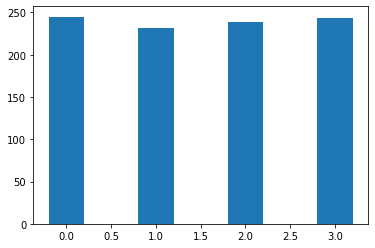

In [21]:
count = np.zeros(4)
Outputrange = np.arange(0,4,1)

for i in range(0,4):
    count[i] = np.count_nonzero(y_train == i) #summing instances of the classes in the training set 

plt.bar(Outputrange,count,width =0.4) #plotting the histogram 
#One is able to note, that the training set is balanced, since each class almost has the same amount 

<BarContainer object of 4 artists>

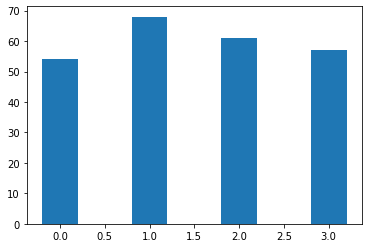

In [22]:
count = np.zeros(4)
Outputrange = np.arange(0,4,1)

for i in range(0,4):
    count[i] = np.count_nonzero(y_test == i)#counting the instances of each class in the test set 

plt.bar(Outputrange,count,width =0.4)#plotting 

# QUESTION 2:  [10 marks]

## You will be developing a multi-class method using the one-vs-rest method. The number of unique classes is four and therefore you need to develop four binary classification models. This necessitates that you extract four one-vs-rest (OvR) training sets out of the full training set.  
## Extract these four OvR datasets. 
## Label the X_train and y_train matrices as X_train_[class] and y_train_[class]
## e.g X_train_above, y_train_above for the class "above"


In [23]:
x_train_above = np.copy(X_train)#we note that the x_train stays the same
x_train_under = np.copy(X_train)
x_train_left = np.copy(X_train)
x_train_right = np.copy(X_train)

y_train_above = np.zeros(len(y_train)) #we set all the elements to 0 
y_train_under = np.zeros(len(y_train))
y_train_left = np.zeros(len(y_train))
y_train_right = np.zeros(len(y_train))

for i in range(len(X_train)):#for each class
    if(y_train[i] == 0): #we identify it's positive cases, indicating so by setting them to 1 
        y_train_above[i]=1
    if(y_train[i] == 1):
        y_train_under[i]=1
    if(y_train[i] == 2):
        y_train_left[i]=1
    if(y_train[i] == 3):
        y_train_right[i]=1
#negative cases automatically set to 0 

In [24]:
print(y_train.shape) #make sure the shapes stay as before. (we don't expect them to change )
print(y_train_above.shape)
print(y_train_under.shape)
print(y_train_left.shape)
print(y_train_right.shape)
print(y_train_above) #print statements to check 

(959,)
(959,)
(959,)
(959,)
(959,)
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.
 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 

# QUESTION 3:  [10 marks]

## Compute the class distribution for each OvR dataset (i.e four distributions in total)


<BarContainer object of 2 artists>

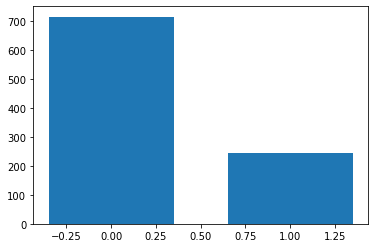

In [25]:
#repeating the process like in question 1, with only two classes this time 
#the postive and negative case 
#we would expect there to be 3 times the amount of negative cases 
count = np.zeros(2)
Outputrange = np.arange(0,2,1)

for i in range(0,2):
    count[i] = np.count_nonzero(y_train_above == i) 

plt.bar(Outputrange,count,width =0.7)

<BarContainer object of 2 artists>

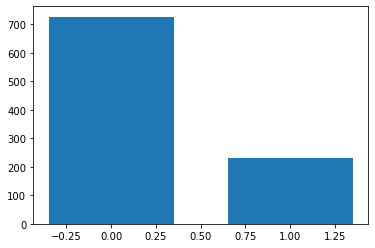

In [26]:
count = np.zeros(2)
Outputrange = np.arange(0,2,1)
for i in range(0,2):
    count[i] = np.count_nonzero(y_train_under == i)

plt.bar(Outputrange,count,width =0.7)

<BarContainer object of 2 artists>

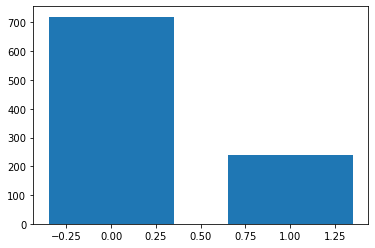

In [27]:
count = np.zeros(2)
Outputrange = np.arange(0,2,1)
for i in range(0,2):
    count[i] = np.count_nonzero(y_train_left == i)

plt.bar(Outputrange,count,width =0.7)

<BarContainer object of 2 artists>

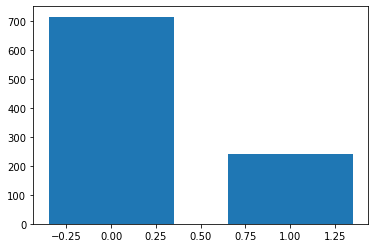

In [28]:
count = np.zeros(2)
Outputrange = np.arange(0,2,1)
for i in range(0,2):
    count[i] = np.count_nonzero(y_train_right == i)

plt.bar(Outputrange,count,width =0.7)

# QUESTION 4:  [40 marks]

## Adapt the gradient descent algorithm developed in class to train the four models, one at a time.  In this case you've got six features and so the weight vector per model (recall that you have four of these) is of length 7.
## Label the four models as lr_model_[class], for example lr_model_above for the class "above" and save the weights and other useful output in a dictionary ( lr_model_[class] )


In [29]:
#The modifcations made include removing the splitting, and anything related with the test set 

def lr_model_modified(X_data, 
                   y_data, 
                   split_frac=0.8, 
                   init_weight=0.00001, 
                   no_iterations=2000,
                   alpha = 0.001,
                   phi = 0.001): #phi is lamda
    #
    # X_data : data feature matrix
    # y_data : data output labels
    # split_frac : data split fraction
    # init_weight : initial weights
    # alpha : learning rate
    #
    
    X_data = np.copy(X_data)
    y_data = np.copy(y_data)
    
    N = X_data.shape[1] # number of features
    W = np.full((N+1,1), init_weight) # initialise weight vectors
    
    m=y_data.shape[0]# no of elts 
    
    history_loss=[]
    
    #
    for itr in range(no_iterations):
        
        y_pred_pr = predict_y_prob(W,X_data).ravel() #predictions fn call
        loss = lr_loss_function(y_data,y_pred_pr) #loss calculation 
        
        
        history_loss.append(loss)
        #
        #################################################################################
        # code below to update w[0]
        W[0] = W[0] + alpha * (y_data - y_pred_pr).sum()/m 
        #################################################################################
        #
        #################################################################################        
        # code below to update w[1...N]
     
        for j in range(1,N+1):
            W[j] = W[j] + (alpha * (y_data - y_pred_pr)*X_data[:,j-1] - phi*W[j]).sum()/m
            
        #################################################################################
    #
    return {'weights':W, 'history':{'train_loss':history_loss},
            'train_acc':get_accuracy(W,X_data,y_data)}


#removing displays relating to test 
def display_results(model):
    #
    history_train_loss = model['history']['train_loss']
    t=range(len(history_train_loss))
    plt.plot(t,history_train_loss,'b')
    #
    print('train acc : ', model['train_acc'])
    #
    print('Weights : ', model['weights'].ravel())
    return 0

train acc :  0.9249217935349322
Weights :  [-2.40258185 -0.38088435  0.18928951 -0.13025291 -1.07693793 -0.07527153
  2.09355721]


0

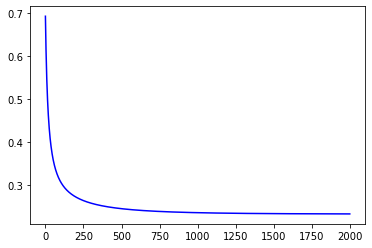

In [30]:
#below we expect a high training accuracy, and weights without massive values
lr_model_above = lr_model_modified(x_train_above, y_train_above,split_frac=0.8, 
                   init_weight=0.00001, no_iterations=2000,
                   alpha = 0.1,
                   phi =.001)
display_results(lr_model_above)#function calls for all the classes

train acc :  0.921793534932221
Weights :  [-2.1404625  -0.13904592 -0.05289748 -0.10324564  0.30087074  0.04729788
 -2.08642159]


0

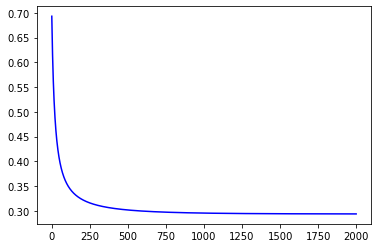

In [31]:
lr_model_under = lr_model_modified(x_train_under, y_train_under,split_frac=0.8, 
                   init_weight=0.00001, no_iterations=2000,
                   alpha = 0.1,
                   phi =.001)
display_results(lr_model_under)

train acc :  0.921793534932221
Weights :  [-2.3700903   0.05362401 -0.96810162  0.20567929  0.1322014  -2.08887853
  0.04749724]


0

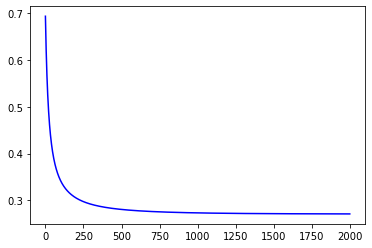

In [32]:
lr_model_left_of = lr_model_modified(x_train_left, y_train_left,split_frac=0.8, 
                   init_weight=0.00001, no_iterations=2000,
                   alpha = 0.1,
                   phi =.001)
display_results(lr_model_left_of)

train acc :  0.9436913451511991
Weights :  [-2.45505604  1.10941291  0.06890734  0.28995323 -0.04186452  2.1107227
  0.14196136]


0

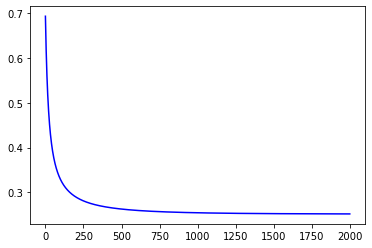

In [33]:
lr_model_right_of = lr_model_modified(x_train_right, y_train_right,split_frac=0.8, 
                   init_weight=0.00001, no_iterations=2000,
                   alpha = 0.1,
                   phi =.001)
display_results(lr_model_right_of)

# QUESTION 5:  [10 marks]
## Compute the overall classification accuracy on the test set.

In [34]:
weightDict = {0: lr_model_above['weights'], 1: lr_model_under['weights'], 
        2: lr_model_left_of['weights'],3: lr_model_right_of['weights']}
#defining a dictionary to hold all the weight vectors 

def get_accuracy(W,X,y):
    # W is the dictionary of weight vectors [[w_0],[w_1],[w_2],...] of size [N+1,1]
    # X is the feature matrix [m,N] where m is the number of examples
    # y is the gold label vector of size (m,)
    #
    # Write down your code below to compute the accuracy
    # in predicting the positive class and return a scalar
    
    #Note bias for X added in function call 
    
    listAbovePred, listUnderPred, listLeftPred, listRightPred = [],[],[],[]
    predicitionDict = {0: listAbovePred, 1: listUnderPred, 2: listLeftPred, 3: listRightPred}
    #defining a prediction dictionary to hold all the probabilities predictions 
     
    for keys in W:
        Y_pred = predict_y_prob(W.get(keys),X)
        predicitionDict[keys] = Y_pred 
        #in the dictionary we store all the probabilities, for all the weight vectors 

    predicitions = []
    
    #with these probabilities, based on the maximum probability, we assign the class and add it to the array     
    for i in range(len(X)):
        if(predicitionDict[0][i] > max(predicitionDict[1][i],predicitionDict[2][i],predicitionDict[3][i])):
            predicitions.append(0)
        if(predicitionDict[1][i] > max(predicitionDict[0][i],predicitionDict[2][i],predicitionDict[3][i])):
            predicitions.append(1)
        if(predicitionDict[2][i] > max(predicitionDict[0][i],predicitionDict[1][i],predicitionDict[3][i])):
            predicitions.append(2)
        if(predicitionDict[3][i] > max(predicitionDict[0][i],predicitionDict[1][i],predicitionDict[2][i])):
            predicitions.append(3)
            
    #################################################################################  
    acc = (predicitions == y).astype(int).sum()/y.shape[0] 
    #we sum the amount of times we were correct in predicting across all the instances 
    #this is the accuracy 
    #################################################################################
    #
    return acc

In [35]:
(get_accuracy(weightDict,X_test,y_test))

0.8291666666666667

# Question 6 [10 marks]

## Compute the recall score for each class separately and compare the scores to the accuracies of the individual OvR models



In [36]:
instances = 0
correctPred = 0 

predictionArray = (predict_y_prob(lr_model_above['weights'],X_test)>= 0.5).astype(int)
#we get a probability, and assign a 1 or 0 based on the likelyhood deduced from the probability 

for i in range(len(y_test)):#across all the test set 
    if(y_test[i] == 0): #count instances for above 
        instances += 1 
    if(predictionArray[i] == 1 and y_test[i] == 0): #count amount of times, this was correctly predicted
        correctPred += 1
        
recallScore_above = correctPred / instances #computing recall score for above class 
print(recallScore_above)

0.8703703703703703


In [37]:
#repeated as above for the other classes 
instances = 0
correctPred = 0 

predictionArray = (predict_y_prob(lr_model_under['weights'],X_test)>= 0.5).astype(int)

for i in range(len(y_test)):
    if(y_test[i] == 1):
        instances += 1 
    if(predictionArray[i] == 1 and y_test[i] == 1):
        correctPred += 1
        
recallScore_under = correctPred / instances
print(recallScore_under)

0.7352941176470589


In [38]:
instances = 0
correctPred = 0 

predictionArray = (predict_y_prob(lr_model_left_of['weights'],X_test)>= 0.5).astype(int)

for i in range(len(y_test)):
    if(y_test[i] == 2):
        instances += 1 
    if(predictionArray[i] == 1 and y_test[i] == 2):
        correctPred += 1

recallScore_left = correctPred / instances
print(recallScore_left)

0.8852459016393442


In [39]:
instances = 0
correctPred = 0 

predictionArray = (predict_y_prob(lr_model_right_of['weights'],X_test)>= 0.5).astype(int)

for i in range(len(y_test)):
    if(y_test[i] == 3):
        instances += 1 
    if(predictionArray[i] == 1 and y_test[i] == 3):
        correctPred += 1
        
recallScore_right = correctPred / instances
print(recallScore_right)

0.9122807017543859


# Question 7 [10 marks]

## Compute the confusion matrix and determine which class (or classes in case of a tie) is/are mostly confused with recalling "under".



In [40]:
def confusionMatrix(W,X,y):
    # W is the weight vector [[w_0],[w_1],[w_2],...] of size [N+1,1]
    # where N is number of features, excluding bias
    # X is the feature matrix [m,N] where m is the number of examples
    # y is the gold label vector of size (m,)
    #
    # Write down your code below to compute the accuracy
    # in predicting the positive class and return a scalar
    
    #Note bias for X added in function call 
    
    listAbovePred, listUnderPred, listLeftPred, listRightPred = [],[],[],[]
    predicitionDict = {0: listAbovePred, 1: listUnderPred, 2: listLeftPred, 3: listRightPred}
     
    for keys in W:
        Y_pred = predict_y_prob(W.get(keys),X)
        predicitionDict[keys] = Y_pred 

    predicitions = []
        
    for i in range(len(X)):
        if(predicitionDict[0][i] > max(predicitionDict[1][i],predicitionDict[2][i],predicitionDict[3][i])):
            predicitions.append(0)
        if(predicitionDict[1][i] > max(predicitionDict[0][i],predicitionDict[2][i],predicitionDict[3][i])):
            predicitions.append(1)
        if(predicitionDict[2][i] > max(predicitionDict[0][i],predicitionDict[1][i],predicitionDict[3][i])):
            predicitions.append(2)
        if(predicitionDict[3][i] > max(predicitionDict[0][i],predicitionDict[1][i],predicitionDict[2][i])):
            predicitions.append(3)
            
    ################################################################################# 
    #till here the function is the same as found in question 4 
    
    confusion_matrix = [[0,0,0,0], 
                       [0,0,0,0],
                       [0,0,0,0],
                       [0,0,0,0]] # we define an empty confusion matrix 
    
    for i in range(len(y)): #for all of the test set 
        if(y[i] == predicitions[i]): 
            row = y[i]
            confusion_matrix[int(y[i])][int(y[i])] += 1 #count the matches (stored in the diagonal)
        else:
            confusion_matrix[int(y[i])][int(predicitions[i])] += 1 
            #count the confusions, and set the matrix accordingly 
    
    return confusion_matrix #returning the confusion matrix 
        
        

In [41]:
confusion_matrix = confusionMatrix(weightDict,X_test,y_test)

In [42]:
print(" A","  U"," L"," R") #printing the matrix 
for i in range(len(weightDict)):
    print(confusion_matrix[i])
#one is able to note the sum of each coloum is the same as the amount of instances for the respective class 

 A   U  L  R
[44, 0, 4, 6]
[1, 50, 10, 7]
[1, 4, 54, 2]
[3, 2, 1, 51]


In [43]:
#In the second row relating to under we have [1,50,10,7]
#this means it was recalled properly 50 times out of 68 
#it was confused mostly (10 times) with being left 